# Monte Carlo Forecast



In [50]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta  
import random
import numpy as np

In [37]:
total_work_items = 30
num_of_iterations = 10000
now = datetime.now()

In [38]:
cycle_times = [2, 3, 5, 8, 3, 5 , 6, 2, 8, 1, 4, 3, 1]

In [39]:
def cumulative_sum(total_work_items, cycle_times, selector):
    total = []
    for i, e in enumerate(range(total_work_items)):
        if i == 0:
            total.append(selector(cycle_times))
        else:
            total.append(selector(cycle_times) + total[i-1])
    return total    

In [40]:
cumulative_sum_min = cumulative_sum(total_work_items, cycle_times, min)
cumulative_sum_max = cumulative_sum(total_work_items, cycle_times, max)

list_random_waks = []

for i in range(num_of_iterations):
    list_random_waks.append(cumulative_sum(total_work_items, cycle_times, random.choice))

In [41]:
range_work_items = [x for x in range(total_work_items)]

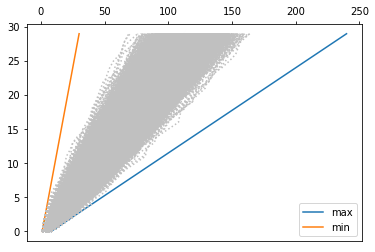

In [42]:
fig, ax = plt.subplots()
plt.plot(cumulative_sum_max, range_work_items, label='max')
plt.plot(cumulative_sum_min, range_work_items, label='min')
for r in list_random_waks:
    plt.plot(r, range_work_items, color='silver', linestyle='dotted')
plt.legend(loc='best')

ax.xaxis.tick_top()

In [47]:
totals = []

for i in list_random_waks:
    totals.append(i[-1])


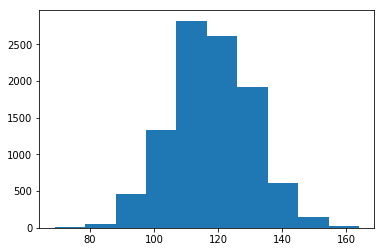

In [48]:
plt.hist(totals);

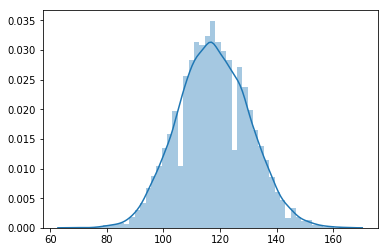

In [49]:
sns.distplot(totals)

In [53]:
q = [50, 85, 95]
np.percentile(totals, q)

array([ 117.,  131.,  138.])